# Machine Learning with Iris Dataset

## Exploratory Data Analysis of Iris Flower Dataset

**Importing Libraries and Loading the Dataset which is a csv file**

In [27]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

iris=pd.read_csv('IRIS.csv')
print(iris.shape)

(150, 5)


### Preview of Data
*It has 150 observations(rows) with 4 features(columns).*

*It has no null values.*

In [28]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [29]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**There are 50 observations for each species**

In [31]:
iris['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

#### Bar Plot :    
_Here the frequency of the observations of each species is plotted._

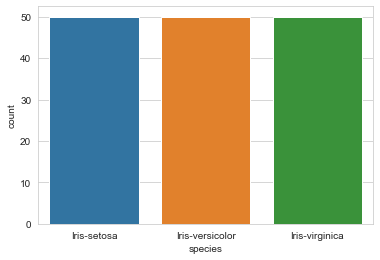

In [32]:
sn.countplot('species',data=iris)
plt.show()

#### Pie Chart :

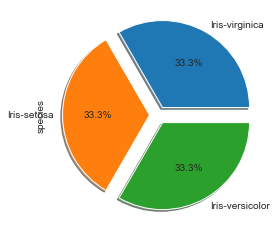

In [33]:
iris['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(6,4))
plt.show()

### Visualization of Data 

#### Scatter Plot : Sepallength Vs Sepalwidth

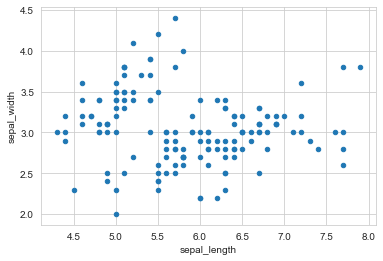

In [79]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.show()

#### Scatter Plot : Petallength Vs Petalwidth

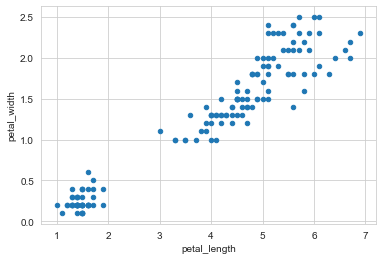

In [80]:
iris.plot(kind='scatter',x='petal_length',y='petal_width')
plt.show()

#### Facet-Grid : Sepallength Vs Sepalwidth

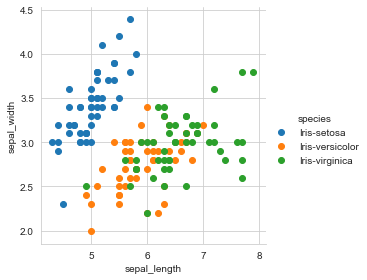

In [36]:
sn.set_style("whitegrid");
sn.FacetGrid(iris,hue="species",height=4).map(plt.scatter,'sepal_length','sepal_width').add_legend();
plt.show()

#### Facet-Grid : Petallength Vs Petalwidth

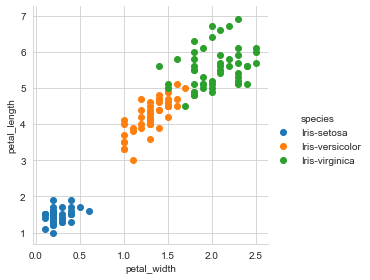

In [37]:
sn.set_style("whitegrid");
sn.FacetGrid(iris,hue="species",height=4).map(plt.scatter,'petal_width','petal_length').add_legend();
plt.show()

#### Pair Plots : 
_Petal length and Petal width are the most useful features to identify various flower types._

_Setosa can be easily identified where as versicolor and virginica have some overlaps._

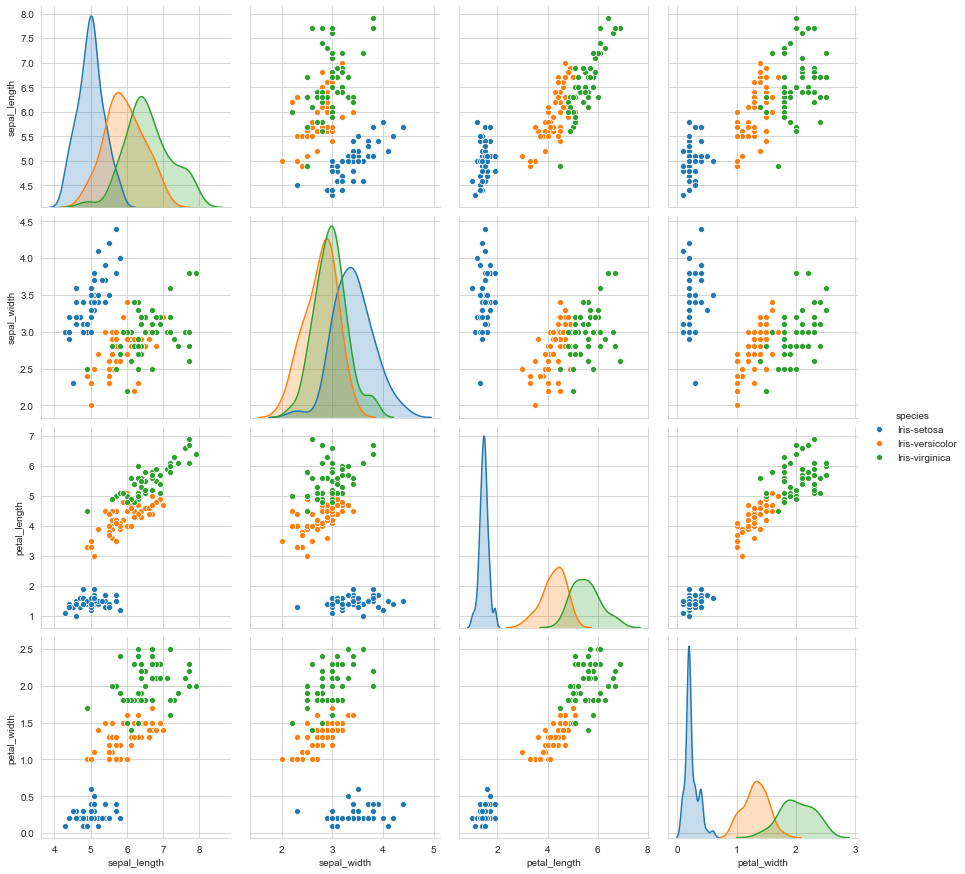

In [81]:
plt.close()
sn.set_style("whitegrid")
sn.pairplot(iris,hue="species",height=3)
plt.show()

### Histogram :

**Now let us see how each feature is distributed using histogram**

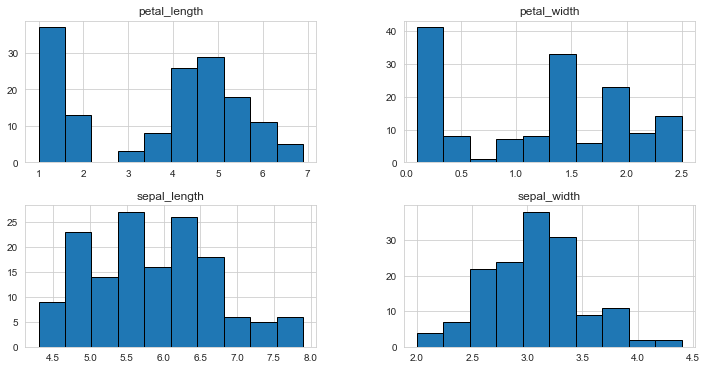

In [82]:
iris.hist(edgecolor = "black")
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#### Univariate analysis using PDF 
_PDF gives the number of flowers of specified length._

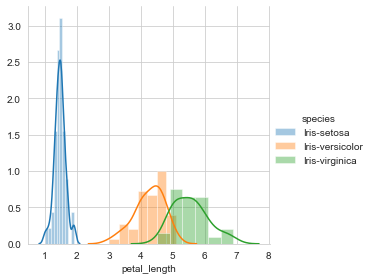

In [83]:
sn.FacetGrid(iris,hue="species",height=4).map(sn.distplot,'petal_length').add_legend()
plt.show()

_PDF for Sepalwidth results in overlapping of species._

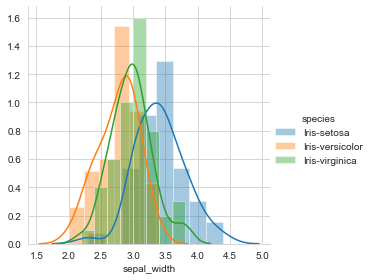

In [40]:
sn.FacetGrid(iris,hue="species",height=4).map(sn.distplot,'sepal_width').add_legend()
plt.show()

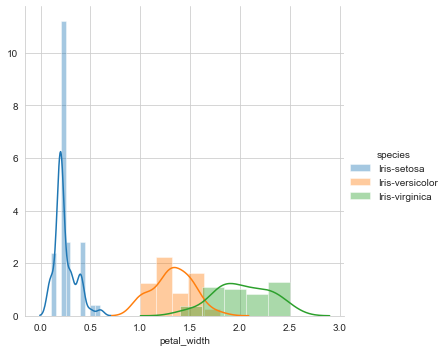

In [87]:
sn.FacetGrid(iris,hue="species",height=5).map(sn.distplot,"petal_width").add_legend()
plt.show()


_Iris Setosa is separated correctly only using petal length.Overlapping occurs sepal width._

_petal_length > petal_width >> sepal_length >>> sepal_width follows this order in separating the species._

### 1-d Scatter Plot :

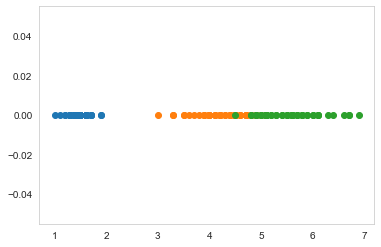

In [86]:
iris_setso = iris.loc[iris["species"] == "Iris-setosa"];
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"];
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"];
plt.plot(iris_setso["petal_length"],np.zeros_like(iris_setso["petal_length"]), 'o')
plt.plot(iris_versicolor["petal_length"],np.zeros_like(iris_versicolor["petal_length"]), 'o')
plt.plot(iris_virginica["petal_length"],np.zeros_like(iris_virginica["petal_length"]), 'o')
plt.grid()
plt.show()  

### PDF and CDF :

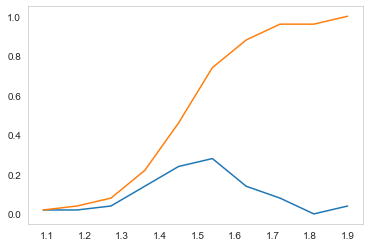

In [89]:
counts , bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.grid()                   
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

**Mean , Variance and Standard deviation :**
    
   _One simple value can corrupt the mean and standard deviation by adding any value to data._

In [90]:
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(np.append(iris_setosa["petal_length"],50)));  #outlier by adding 50
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.552
4.26


In [46]:
print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(np.append(iris_setosa["petal_length"],50)));   #standard deviation  outlier
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))


Std-dev:
0.17176728442867115
6.731587015311736
0.5463478745268441
0.4651881339845204


#### Percentiles :


In [47]:
print(np.percentile(iris_setosa["petal_length"],np.arange(0,100,25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0,100,25)))
print(np.percentile(iris_versicolor["petal_length"],np.arange(0,100,25)))


[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


In [48]:
from statsmodels import robust
print(robust.mad(iris_setosa["petal_length"]))

0.14826022185056031


### Box Plots :

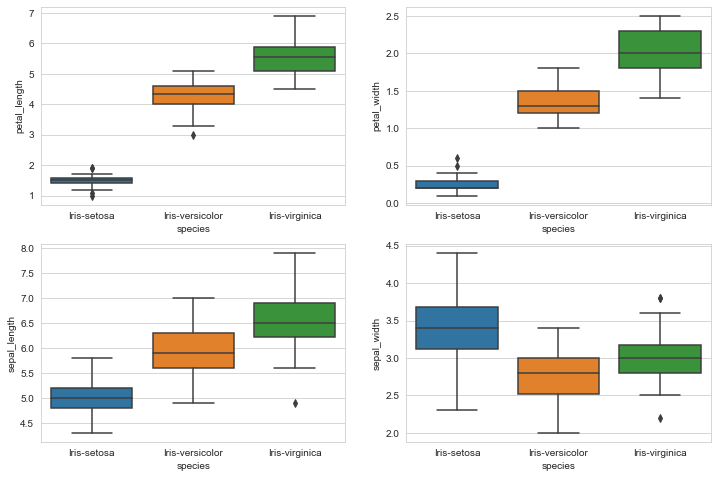

In [49]:
plt.figure(figsize=(12,8))
sn.set_style('whitegrid')
plt.subplot(2,2,1)
sn.boxplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sn.boxplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sn.boxplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sn.boxplot(x='species',y='sepal_width',data=iris)
plt.show()

### Violin Plots :

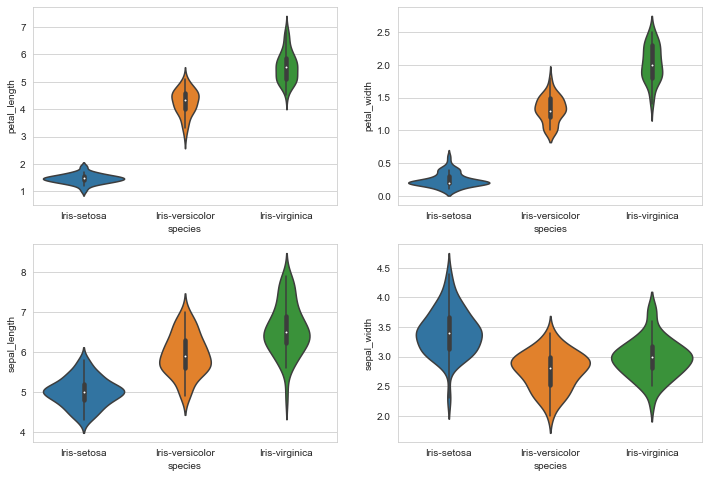

In [50]:
plt.figure(figsize=(12,8))
sn.set_style('whitegrid')
plt.subplot(2,2,1)
sn.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sn.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sn.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sn.violinplot(x='species',y='sepal_width',data=iris)
plt.show()

### Joint Plot :

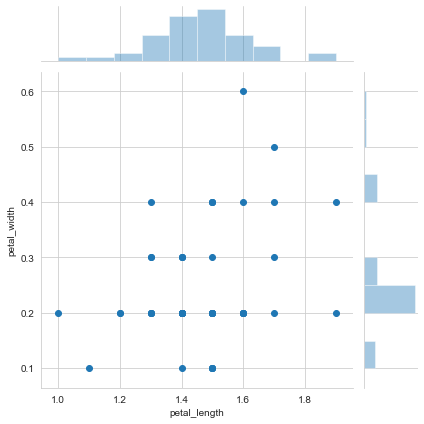

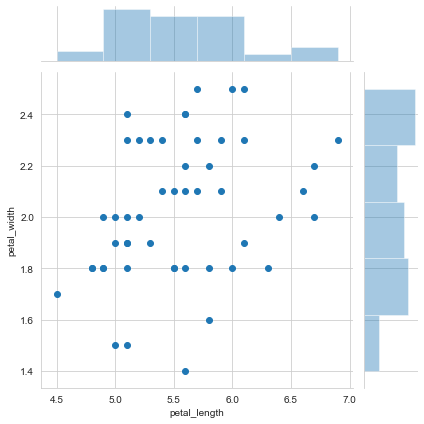

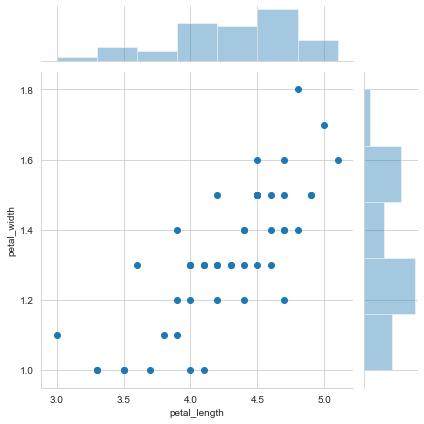

In [92]:
sn.jointplot(x="petal_length",y="petal_width",data=iris_setosa)
sn.jointplot(x="petal_length",y="petal_width",data=iris_virginica)
sn.jointplot(x="petal_length",y="petal_width",data=iris_versicolor)
plt.show()

## K-NN Classification Model of Iris Dataset

**Categorizing the values as X(petal_length) and y(class label).**

In [117]:
X = iris.iloc[:,:-1].values    
print(X[3])                        #printing a row for sample understanding

[4.6 3.1 1.5 0.2]


In [108]:
y = iris.iloc[:,4].values
print(y[3])                        #printing a row for sample understanding

Iris-setosa


**Splitting the dataset into training data and testing data using train_test_split.**

In [135]:
from sklearn.model_selection import train_test_split            
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [136]:
X_train.shape

(105, 4)

In [137]:
X_test.shape

(45, 4)

**Performing Standardization for feature scaling** 

In [138]:
from sklearn.preprocessing import StandardScaler      #standardisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Choosing suitable k-value which gives highest accuracy**

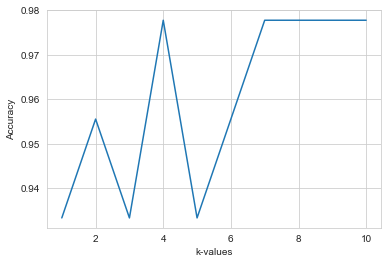

In [140]:
from sklearn.neighbors import KNeighborsClassifier 
s=[]
for i in range(1,11):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train , y_train)
    s.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,11),s)
plt.xlabel("k-values")
plt.ylabel("Accuracy")
plt.show()

**K-Nearest Neighbours**

In [141]:
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777777777777777

**Conclusion:**
_For K-NN model ,the value of k determines the level of complexity .A lower value of K means that the model is more complex._

_The model predicted with 0.97 accuracy._